# LECTURE 12

# A REPORT ON MASS SHOOTINGS IN US IN 2016
-BY ZAID HAWA A 44

In [1]:
# setup of jupyter notebook
import pandas as pd

In [2]:
# import our dataset 
shootings_df = pd.read_csv("Mass-Shooting-Data-2016.csv")
shootings_df

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628


In [3]:
# create a column called persons involved
shootings_df["persons_involved"] = shootings_df["injured"] + shootings_df["killed"]
shootings_df

,date,city,state,injured,killed,lat,lng,persons_involved
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421,4
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595,4
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628,6
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194,4
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728,4
...,...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589,5
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646,4
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421,5
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628,4


In [4]:
# what was the meax persons involved in mass shootings in 2016
max_persons_involved = shootings_df.persons_involved.max()
print("the maximum persons involved in a mass shooting incident in 2016 was" , max_persons_involved, "people")

the maximum persons involved in a mass shooting incident in 2016 was 103 people


In [5]:
total_persons_involved = shootings_df.persons_involved.sum()
print("the total persons involved in a mass shooting incident in 2016 was" , total_persons_involved, "people")

the total persons involved in a mass shooting incident in 2016 was 1711 people


In [6]:
average_injured = shootings_df.persons_involved.mean()
print("the average persons involved in a mass shooting incident in 2016 was" , average_injured, "people")

the average persons involved in a mass shooting incident in 2016 was 5.264615384615385 people


In [7]:
# what was the top 5 mass shooting incidents by persons invoved in 2016?
top_5_incidents = shootings_df.sort_values("persons_involved", ascending = False).head(5)
top_5_incidents

,date,city,state,injured,killed,lat,lng,persons_involved
187,12-Jun-16,Orlando,Florida,53,50,28.542117,-81.379046,103
117,25-Jul-16,Fort Myers,Florida,19,2,26.640628,-81.872308,21
290,25-Feb-16,Hesston,Kansas,14,4,38.138344,-97.431427,18
133,16-Jul-16,Bakersfield,California,14,1,35.373871,-119.019464,15
22,15-Oct-16,Los Angeles,California,11,4,34.054394,-118.243941,15


# challenge:shows only incidents where there were more than 10 persons involved


In [8]:
atleast_10_involved_df = shootings_df.loc[shootings_df["persons_involved"]>=10]
total_incidents_with_atleast_10 = atleast_10_involved_df.date.count()
print("There were" , total_incidents_with_atleast_10, "mass shootings in which there were atleast 10 people involved")

There were 9 mass shootings in which there were atleast 10 people involved


In [9]:
# the total injured, total killed, total persons by state and city
city_df = shootings_df.groupby(["state", "city"]).agg(total_injured = ("injured", "sum"),
                                                      total_killed = ("killed", "sum"),
                                                      total_persons_involved = ("persons_involved", "sum"),
                                                      total_incidents = ("city", "count"))
city_df.sort_values("total_incidents" , ascending = False)

,,total_injured,total_killed,total_persons_involved,total_incidents
state,city,,,,
Illinois,Chicago,87,11,98,22
Texas,Houston,31,10,41,8
California,Los Angeles,36,8,44,8
Illinois,Chicago (Englewood),23,3,26,6
Florida,Miami,22,7,29,6
...,...,...,...,...,...
Maryland,District Heights (Forestville),4,1,5,1
Alabama,Auburn,1,3,4,1
Massachusetts,Chelsea,6,1,7,1


In [10]:
ab_df = city_df.loc[(city_df["total_persons_involved"] >10) & (city_df["total_incidents"]>3)]
ab_df

total_injured  total_killed  \
state                city                                               
California           Los Angeles                     36             8   
                     Oakland                         27             1   
Colorado             Denver                          12             4   
District of Columbia Washington                      23             2   
Florida              Miami                           22             7   
                     Orlando                         77            55   
Georgia              Atlanta                         18             1   
Illinois             Chicago                         87            11   
                     Chicago (Englewood)             23             3   
Maryland             Baltimore                       26             0   
Michigan             Detroit                         19             4   
Minnesota            Minneapolis                     20             1   
New York             Brooklyn                        24             0   
Pennsylvania         Philadelphia                    14             5   
Tennessee            Memphis                         16             2   
Texas                Houston                         31            10   

                                          total_persons_involved  \
state                city                                          
California           Los Angeles                              44   
                     Oakland                                  28   
Colorado             Denver                                   16   
District of Columbia Washington                               25   
Florida              Miami                                    29   
                     Orlando                                 132   
Georgia              Atlanta                                  19   
Illinois             Chicago                                  98   
                     Chicago (Englewood)                      26   
Maryland             Baltimore                                26   
Michigan             Detroit                                  23   
Minnesota            Minneapolis                              21   
New York             Brooklyn                                 24   
Pennsylvania         Philadelphia                             19   
Tennessee            Memphis                                  18   
Texas                Houston                                  41   

                                          total_incidents  
state                city                                  
California           Los Angeles                        8  
                     Oakland                            6  
Colorado             Denver                             4  
District of Columbia Washington                         5  
Florida              Miami                              6  
                     Orlando                            5  
Georgia              Atlanta                            4  
Illinois             Chicago                           22  
                     Chicago (Englewood)                6  
Maryland             Baltimore                          5  
Michigan             Detroit                            5  
Minnesota            Minneapolis                        4  
New York             Brooklyn                           5  
Pennsylvania         Philadelphia                       4  
Tennessee            Memphis                            4  
Texas                Houston                            8

In [11]:
city_df["persons_involved_per_incident"] = city_df["total_persons_involved"]/city_df["total_incidents"]
city_df

total_injured  total_killed  \
state         city                                               
Alabama       Anniston                         4             0   
              Auburn                           1             3   
              Bessemer                         3             1   
              Bessemer (Brighton)              6             1   
              Birmingham                       4             1   
...                                          ...           ...   
Washington    Seattle                          3             2   
              Tacoma                           5             0   
              Woodland                         1             3   
West Virginia Charleston                       3             1   
Wisconsin     Milwaukee                        5             3   

                                   total_persons_involved  total_incidents  \
state         city                                                           
Alabama       Anniston                                  4                1   
              Auburn                                    4                1   
              Bessemer                                  4                1   
              Bessemer (Brighton)                       7                1   
              Birmingham                                5                1   
...                                                   ...              ...   
Washington    Seattle                                   5                1   
              Tacoma                                    5                1   
              Woodland                                  4                1   
West Virginia Charleston                                4                1   
Wisconsin     Milwaukee                                 8                2   

                                   persons_involved_per_incident  
state         city                                                
Alabama       Anniston                                       4.0  
              Auburn                                         4.0  
              Bessemer                                       4.0  
              Bessemer (Brighton)                            7.0  
              Birmingham                                     5.0  
...                                                          ...  
Washington    Seattle                                        5.0  
              Tacoma                                         5.0  
              Woodland                                       4.0  
West Virginia Charleston                                     4.0  
Wisconsin     Milwaukee                                      4.0  

[194 rows x 5 columns]

In [12]:
z_index_df = city_df.loc[city_df["persons_involved_per_incident"]>10]
z_index_df

total_injured  total_killed  total_persons_involved  \
state       city                                                               
California  Bakersfield             14             1                      15   
Connecticut Bridgeport              13             0                      13   
Florida     Fort Myers              23             2                      25   
            Orlando                 77            55                     132   
Kansas      Hesston                 14             4                      18   

                         total_incidents  persons_involved_per_incident  
state       city                                                         
California  Bakersfield                1                           15.0  
Connecticut Bridgeport                 1                           13.0  
Florida     Fort Myers                 2                           12.5  
            Orlando                    5                           26.4  
Kansas      Hesston                    1                           18.0

## the dangerorus index:
- an incident is dangerous if atleast 1 person killed or 5 people injured
- total dangerorus incidents by city

In [13]:
dangerous_incidents_df = shootings_df.loc [(shootings_df["injured"]>=5) | (shootings_df["killed"]>=1)]
dangerous_incidents_df

,date,city,state,injured,killed,lat,lng,persons_involved
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421,4
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628,6
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418,7
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944,6
8,30-Oct-16,San Antonio,Texas,5,0,29.424600,-98.495140,5
...,...,...,...,...,...,...,...,...
319,17-Jan-16,Ware Neck (Gloucester Courthouse),Virginia,3,1,37.402640,-76.458560,4
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589,5
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421,5
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628,4


In [14]:
dangerous_city_df = dangerous_incidents_df.groupby(["state","city"]).agg(dangerous_incidents = ("city", "count"))
dangerous_city_df

dangerous_incidents
state         city                                    
Alabama       Auburn                                 1
              Bessemer                               1
              Bessemer (Brighton)                    1
              Birmingham                             1
              Blountsville                           1
...                                                ...
Washington    Seattle                                1
              Tacoma                                 1
              Woodland                               1
West Virginia Charleston                             1
Wisconsin     Milwaukee                              2

[153 rows x 1 columns]

In [15]:
top_10_dangerous_cities = dangerous_city_df.sort_values("dangerous_incidents", ascending = False).head(10)
top_10_dangerous_cities

,,dangerous_incidents
state,city,
Illinois,Chicago,11
Texas,Houston,8
Florida,Miami,6
California,Los Angeles,5
Michigan,Detroit,4
Florida,Orlando,4
Georgia,Atlanta,3
Texas,Austin,3
California,Sacramento,3


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
bar_chart_df_all_cities = shootings_df.groupby(["state", "city"]).agg(total_killed = ("killed", "sum"))
bar_chart_df_top_10_cities = bar_chart_df_all_cities.sort_values("total_killed" ,ascending = False).head(10).reset_index()
bar_chart_df_top_10_cities

,state,city,total_killed
0,Florida,Orlando,55
1,Illinois,Chicago,11
2,Texas,Houston,10
3,California,Los Angeles,8
4,Arizona,Glendale,8
5,Ohio,Piketon,8
6,Florida,Miami,7
7,Georgia,Appling,6
8,Texas,Austin,6
9,Texas,Dallas,6


<AxesSubplot:xlabel='city', ylabel='total_killed'>

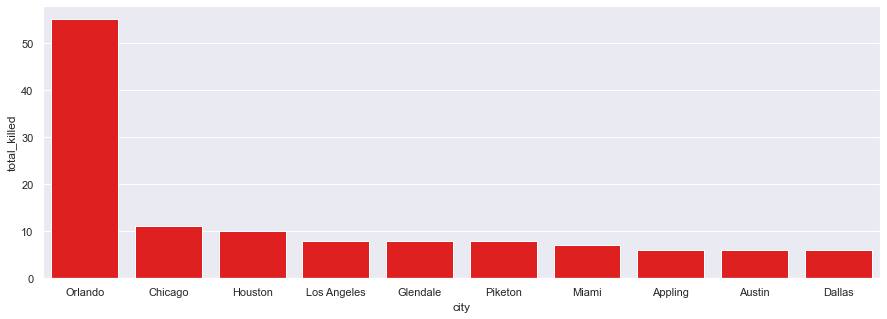

In [18]:
# printing a bar chart
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x ="city", y ="total_killed" , data = bar_chart_df_top_10_cities, color = "red")

# challenge = make a bar chart that shows the top 5 incidents with most citites

In [20]:
incidents_all_cities_df = shootings_df.groupby(["state", "city"]).agg(total_incidents = ("city" , "count"))
incidents_top_5_cities_df = incidents_all_cities_df.sort_values("total_incidents" , ascending = False).head(5).reset_index()
incidents_top_5_cities_df

,state,city,total_incidents
0,Illinois,Chicago,22
1,Texas,Houston,8
2,California,Los Angeles,8
3,Illinois,Chicago (Englewood),6
4,Florida,Miami,6


<AxesSubplot:xlabel='city', ylabel='total_incidents'>

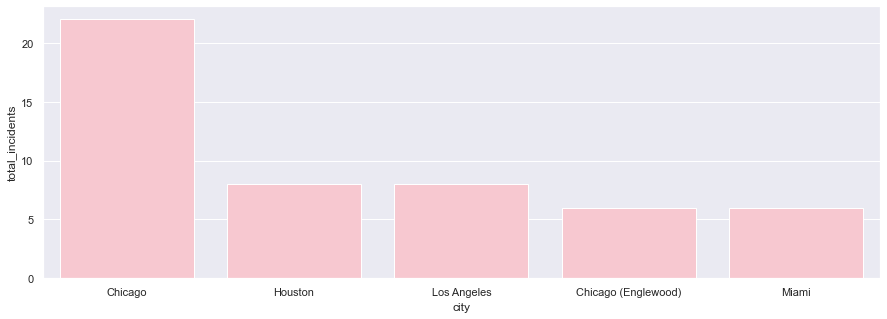

In [22]:
sns.barplot(x ="city", y ="total_incidents" , data = incidents_top_5_cities_df, color = "pink")